<a href="https://colab.research.google.com/github/conextm/python/blob/main/example_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example

***La diabetes es una enfermedad que se produce cuando la glucosa en sangre, también llamada azúcar en sangre, es demasiado alta. La glucosa en sangre es su principal fuente de energía y procede de los alimentos que ingiere. La insulina, una hormona producida por el páncreas, ayuda a que la glucosa de los alimentos llegue a las células y se utilice como fuente de energía.

**Primeros síntomas de la diabetes

* Hambre y fatiga. El cuerpo convierte los alimentos en glucosa que las células utilizan como fuente de energía.
* Orinar con más frecuencia y tener más sed.
* Boca seca y picor en la piel.
* Visión borrosa


Descripcion del dataset

1. **Embarazos (Pregnancies)**
   - Número de veces embarazada.

2. **Glucosa (Glucose)**
   - Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia oral a la glucosa.

3. **Presión Arterial (BloodPressure)**
   - Presión arterial diastólica (mm Hg).

4. **Espesor del Pliegue Cutáneo (SkinThickness)**
   - Espesor del pliegue cutáneo del tríceps (mm).

5. **Insulina (Insulin)**
   - Insulina sérica a las 2 horas (mu U/ml).

6. **Índice de Masa Corporal (BMI)**
   - Índice de masa corporal, calculado como el peso en kg dividido entre el cuadrado de la altura en metros (kg/(m^2)).

7. **Función de Pedigrí de Diabetes (DiabetesPedigreeFunction)**
   - Función de pedigrí de diabetes.

8. **Edad (Age)**
   - Edad (años).

9. **Resultado (Outcome)**
   - Variable de clase (0 o 1). 268 de 768 son 1, los demás son 0.


# IMPORTING THE LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


# LOADING THE DATASET

In [ ]:
data = pd.read_csv('/content/diabetes 2.csv')



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
data.head()  #displaying the head of dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.describe()      #description of dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.shape    #768 rows and 9 columns

(768, 9)

In [ ]:
data.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [ ]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

***Checking Null Values***

In [ ]:
data.isnull().sum()

In [ ]:
data.isnull().any()

In [ ]:
data.isnull().all()

# Exploratory Data Analysis

In [ ]:
data.corr()

In [ ]:
plt.figure(figsize = (12,10))

sns.heatmap(data.corr(), annot =True)



In [ ]:
data.hist(figsize=(18,12))
plt.show()



In [ ]:

plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Glucose',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='BloodPressure',data=data)
plt.subplot(2,3,3)
sns.boxplot(x='Insulin',data=data)
plt.subplot(2,3,4)
sns.boxplot(x='BMI',data=data)
plt.subplot(2,3,5)
sns.boxplot(x='Age',data=data)
plt.subplot(2,3,6)
sns.boxplot(x='SkinThickness',data=data)







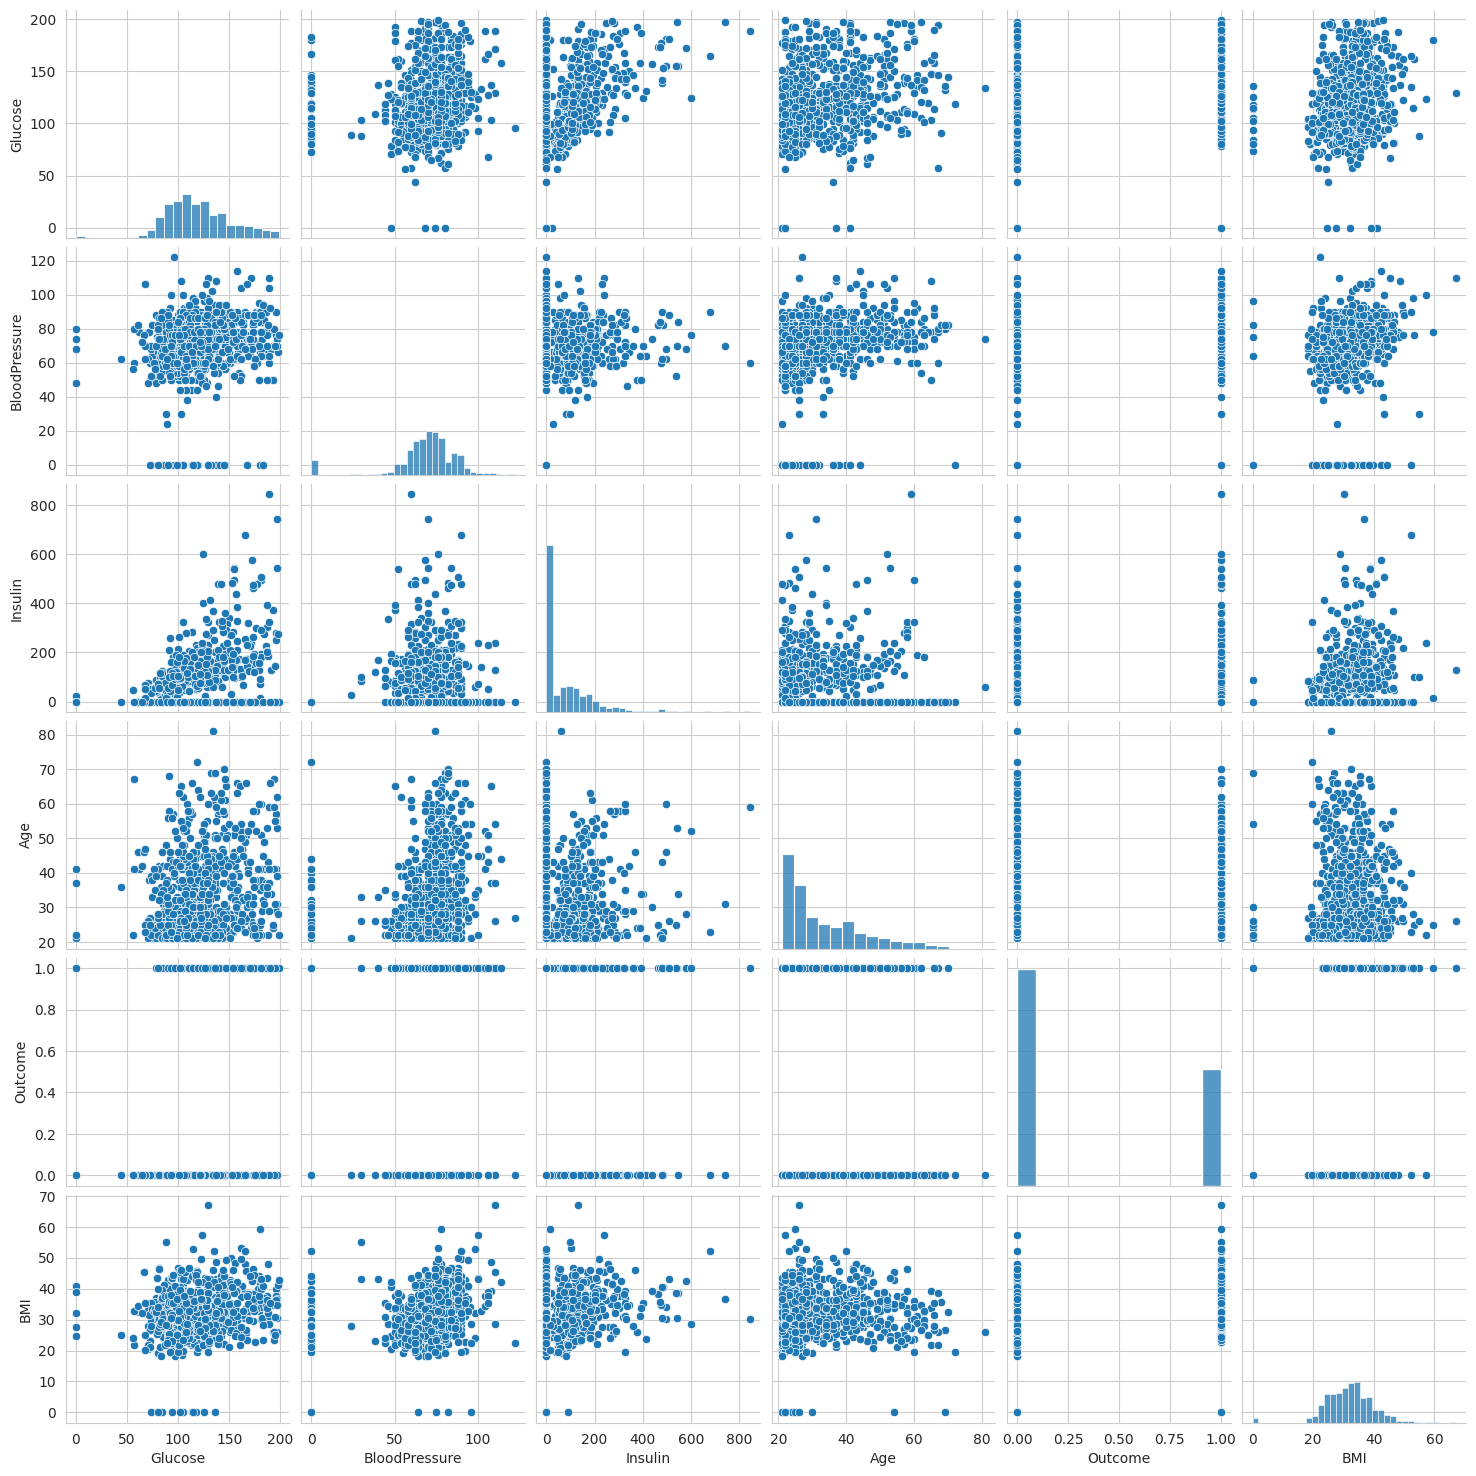

In [ ]:

mean_col = ['Glucose','BloodPressure','Insulin','Age','Outcome','BMI']

sns.pairplot(data[mean_col],palette='Accent')


<Axes: xlabel='Outcome', ylabel='Insulin'>

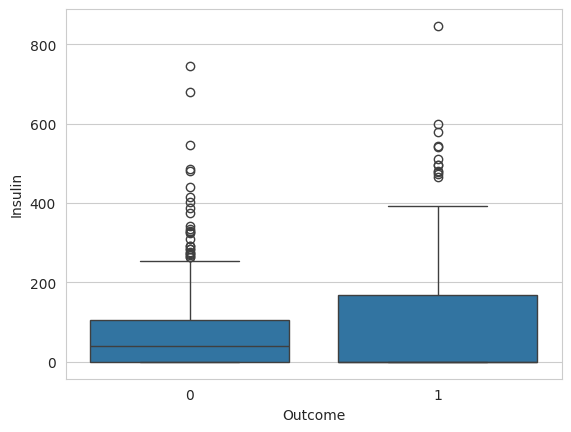

In [ ]:
sns.boxplot(x='Outcome',y='Insulin',data=data)



<Axes: xlabel='BMI', ylabel='Glucose'>

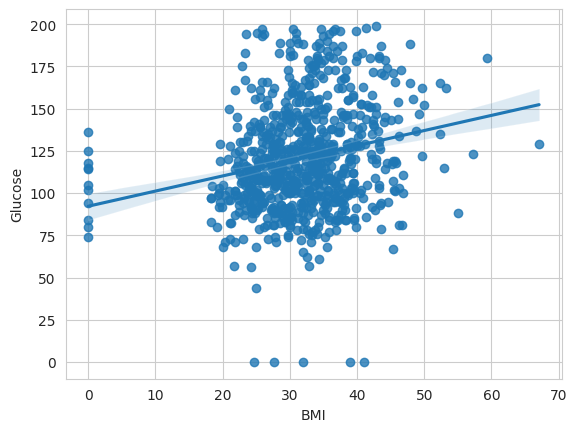

In [ ]:
sns.regplot(x='BMI', y= 'Glucose', data=data)

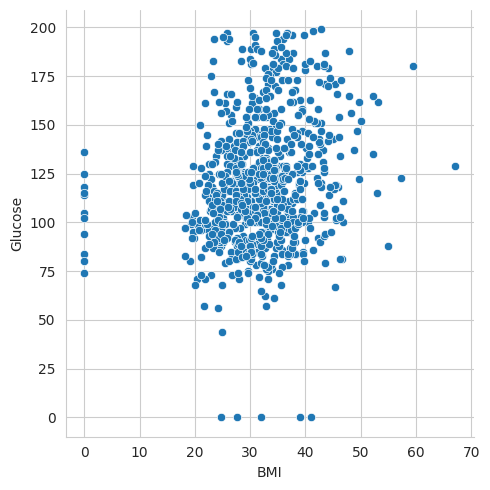

In [ ]:
sns.relplot(x='BMI', y= 'Glucose', data=data)

In [ ]:
sns.scatterplot(x='Glucose', y= 'Insulin', data=data)

In [ ]:
sns.jointplot(x='SkinThickness', y= 'Insulin', data=data)

In [ ]:
sns.pairplot(data,hue='Outcome')


In [ ]:
sns.lineplot(x='Glucose', y= 'Insulin', data=data)

In [ ]:
sns.swarmplot(x='Glucose', y= 'Insulin', data=data)

In [ ]:
sns.barplot(x="SkinThickness", y="Insulin", data=data[170:180])
plt.title("SkinThickness vs Insulin",fontsize=15)
plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.show()
plt.style.use("ggplot")


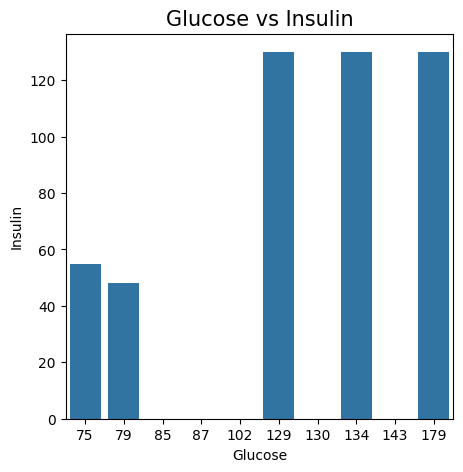

In [ ]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Glucose", y="Insulin", data=data[170:180])
plt.title("Glucose vs Insulin",fontsize=15)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()


# TRAINING AND TESTING DATA

In [ ]:
#train_test_splitting of the dataset

x = data.drop(columns = 'Outcome')

# Getting Predicting Value
y = data['Outcome']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [ ]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))


# MODELS

# 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)

In [ ]:
y_pred=reg.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",reg.score(x_train,y_train)*100)



In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_pred), display_labels = [0, 1])

#Vizualizing the display requires that we import pyplot from matplotlib.

import matplotlib.pyplot as plt

#Finally to display the plot we can use the functions plot() and show() from pyplot.

cm_display.plot()
plt.show()


## Matriz de Confusión

La matriz de confusión para la clasificación de pacientes diabéticos se presenta de la siguiente manera:

|                        | Predicción: No Diabético | Predicción: Diabético |
|------------------------|--------------------------|-----------------------|
| **Real: No Diabético** | 98                       | 9                     |
| **Real: Diabético**    | 18                       | 29                    |

## Métricas de Evaluación

A continuación, se calculan varias métricas importantes basadas en la matriz:

1. **Precisión (Precision)**
   \[
   \text{Precisión} = \frac{TP}{TP + FP} = \frac{29}{29 + 9} \approx 0.763
   \]

2. **Sensibilidad (Recall)**
   \[
   \text{Sensibilidad} = \frac{TP}{TP + FN} = \frac{29}{29 + 18} \approx 0.617
   \]

3. **Especificidad**
   \[
   \text{Especificidad} = \frac{TN}{TN + FP} = \frac{98}{98 + 9} \approx 0.916
   \]

4. **Exactitud (Accuracy)**
   \[
   \text{Exactitud} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{98 + 29}{98 + 29 + 9 + 18} \approx 0.822
   \]

5. **Puntuación F1**
   \[
   F1 = 2 \times \frac{\text{Precisión} \times \text{Sensibilidad}}{\text{Precisión} + \text{Sensibilidad}} \approx 0.682
   \]

## Conclusiones

- La **exactitud general es bastante buena** (82.2%), indicando que la mayoría de las predicciones del modelo son correctas.
- La **especificidad es alta** (91.6%), mostrando que el modelo identifica muy bien a los no diabéticos.
- La **sensibilidad es moderada** (61.7%), implicando que hay espacio para mejorar en la identificación de pacientes diabéticos.
- La **precisión es razonablemente alta** (76.3%), lo que sugiere que las predicciones positivas son mayormente confiables.

## Recomendaciones

Se recomienda ajustar el modelo para incrementar la sensibilidad, y así reducir el número de falsos negativos. Esto es crucial en contextos médicos, donde es vital no pasar por alto a pacientes que realmente padecen la enfermedad.


In [ ]:
y_pred_proba = reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
print(accuracy_score(y_test,y_pred)*100)

# 2. KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)


In [ ]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)


In [ ]:
print(accuracy_score(y_test,y_pred)*100)



# 3. SVC

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)


In [ ]:
y_pred=svc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",svc.score(x_train,y_train)*100)



In [ ]:


print(accuracy_score(y_test,y_pred)*100)


# 4. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)


In [ ]:
y_pred=gnb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gnb.score(x_train,y_train)*100)



In [ ]:
print("Accuracy Score:\n",gnb.score(x_train,y_train)*100)

# 5. DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
accuracy_score= metrics.accuracy_score(y_test, y_pred)
print('accuracy score is', str('{:04.2f}'.format(accuracy_score*100))+'%')

La puntuación de precisión del 76,62% se considera buena.

Podemos mejorar esta precisión ajustando los parámetros del algoritmo del árbol de decisión.



# Visualizing the decisison tree:

In [ ]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'],
                                class_names='Outcome',
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

# 6.  RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)


In [ ]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)


In [ ]:
print(accuracy_score(y_test,y_pred)*100)

# 7. AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(x_train,y_train)




In [ ]:
y_pred=adb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",adb.score(x_train,y_train)*100)



In [ ]:
print(accuracy_score(y_test,y_pred)*100)

# 8. Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)


In [ ]:
y_pred=gbc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gbc.score(x_train,y_train)*100)


In [ ]:
print(accuracy_score(y_test,y_pred)*100)

# 9. XGBClassifier

In [ ]:
from xgboost import XGBClassifier

xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb.fit(x_train, y_train)


In [ ]:
y_pred=xgb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",xgb.score(x_train,y_train)*100)


In [ ]:
xbg_accuracy=print(accuracy_score(y_test,y_pred)*100)

# 10. ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(x_train,y_train)

In [ ]:
y_pred=etc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",etc.score(x_train,y_train)*100)


In [ ]:
print(accuracy_score(y_test,y_pred)*100)

In [ ]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data


***Ahora concluimos la precisión de los diferentes modelos.

* Regresión logística = 82,46
* Clasificador KNeighbors = 75,97
* SVC= 79,22
* Naiye Bayes = 75,73
* Clasificador de árbol de decisión = 73,37 %.
* Clasificador Random Forest = 81,57
* Clasificador Ada Boost = 77,92
* Clasificador Gradient Boosting = 81,81
* Clasificador XGB = 78,57
* Clasificador Extra Trees = 80,51



